Petroleum Dataset:
   Unnamed: 0     DATEPRD  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0           0  2009-01-30             257.442241                105.339191   
1           1  2009-02-11             261.481233                105.364799   
2           2  2009-02-20             264.386001                105.410873   
3           3  2009-02-22             266.709086                105.395959   
4           4  2009-02-23             266.667137                105.410516   

   AVG_DP_TUBING  AVG_CHOKE_SIZE_P   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
0     163.294586         35.298817   94.147654  73.616443      61.049726   
1     164.352071         34.697693   97.129162  80.237200      65.804801   
2     166.214057         34.779443   98.171944  78.439751      64.987169   
3     166.273529         34.054792  100.435557  80.121769      67.330436   
4     166.513059         34.395363  100.154078  81.010145      66.986427   

   BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  
0       4

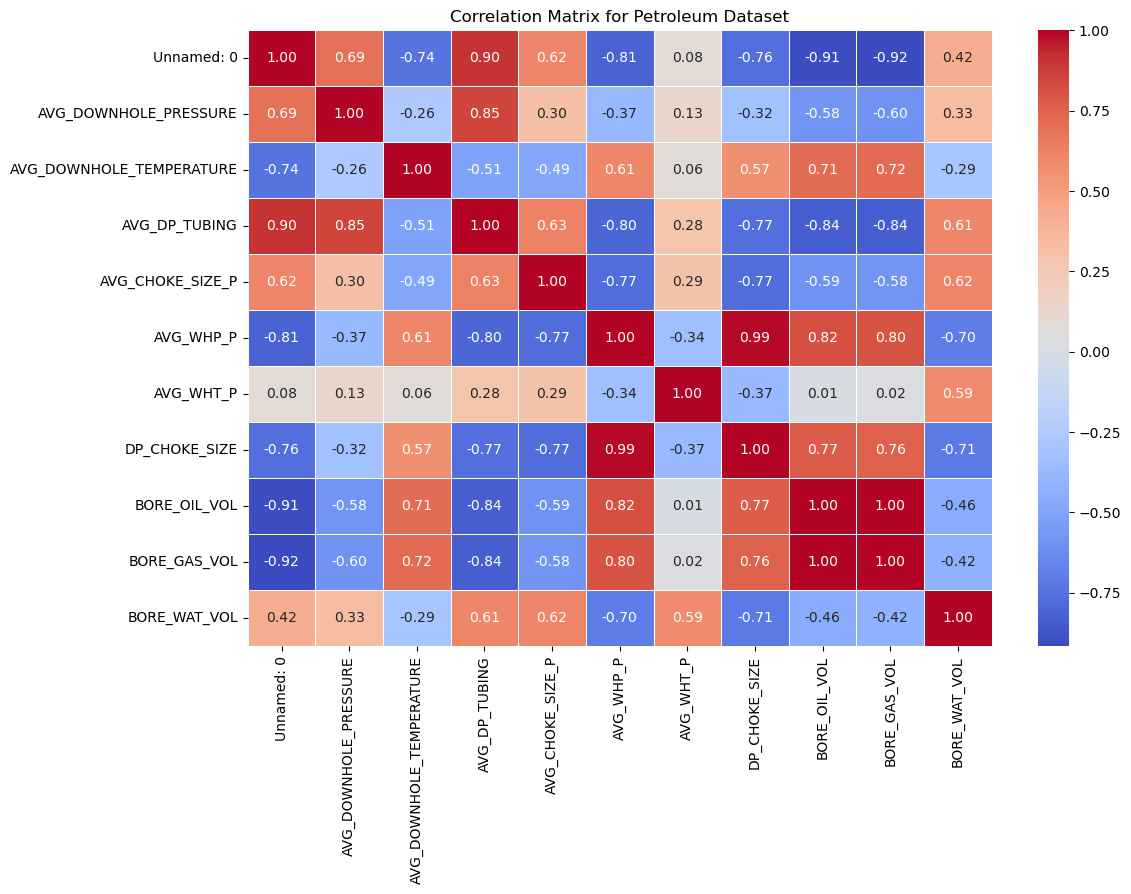

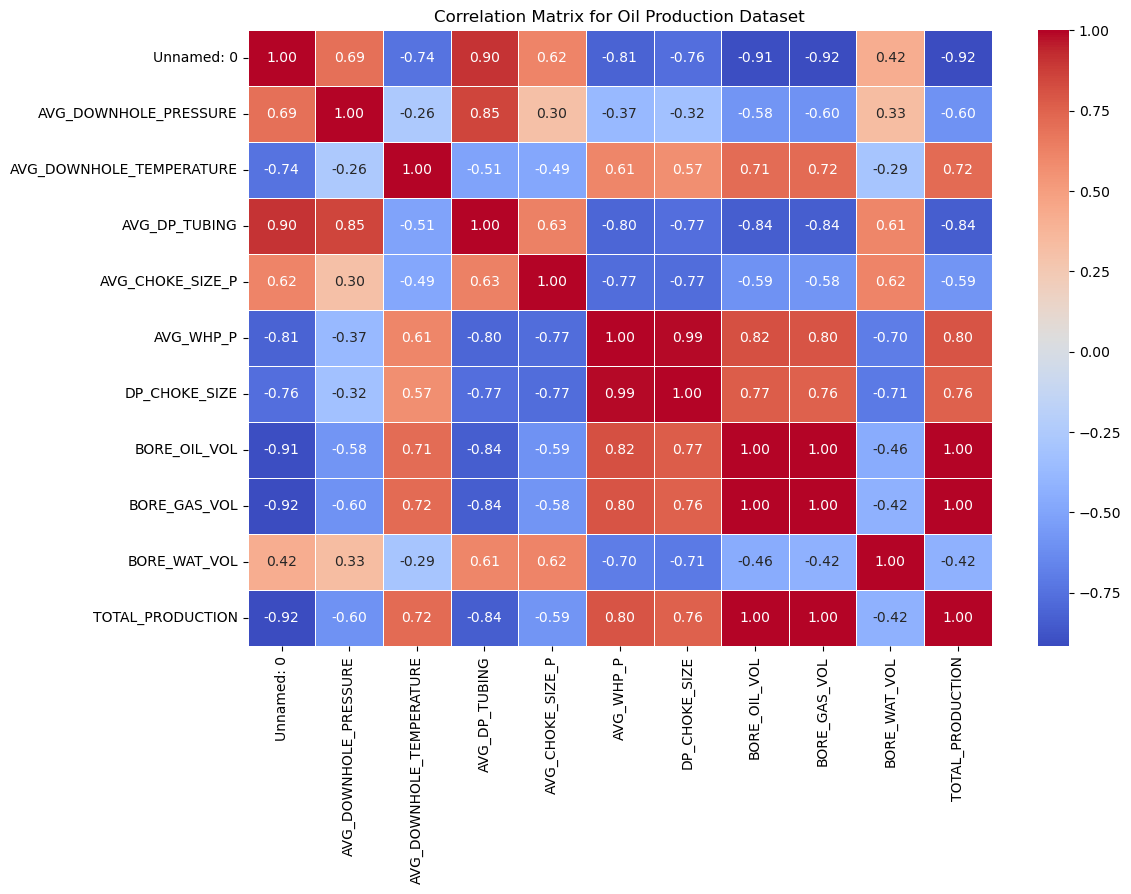

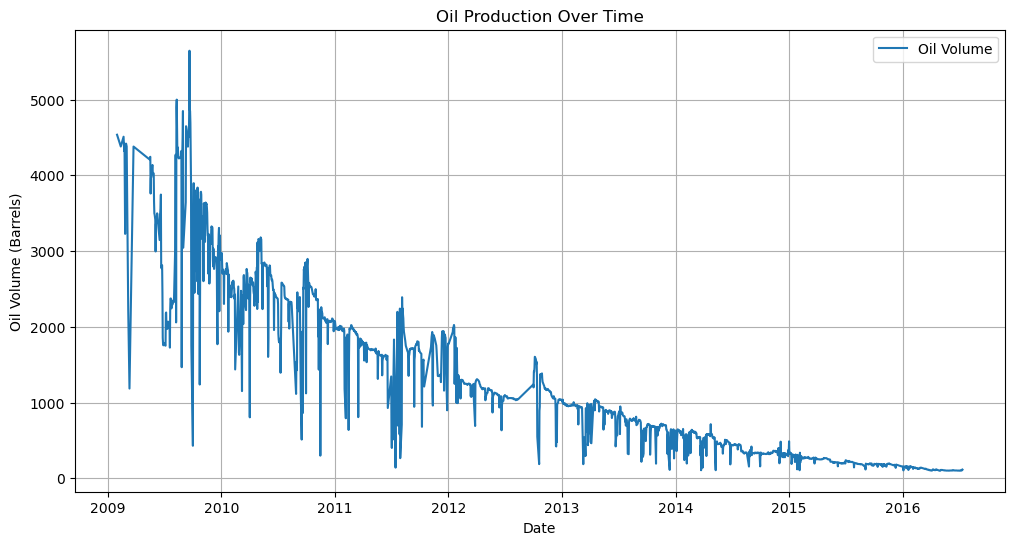

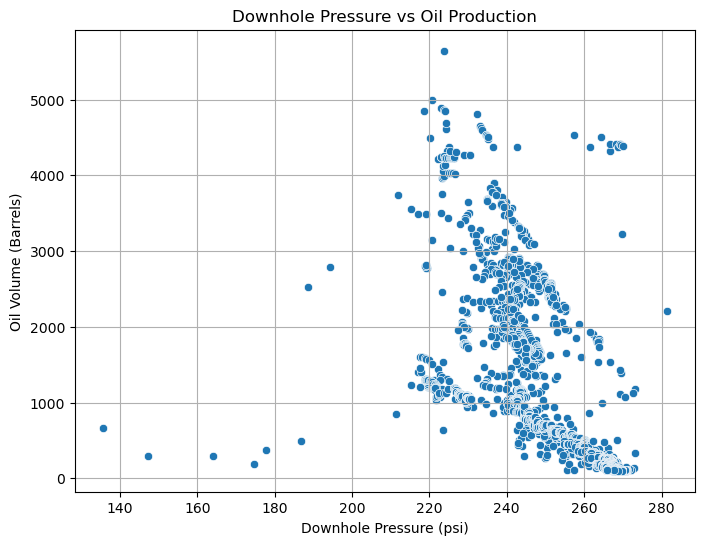

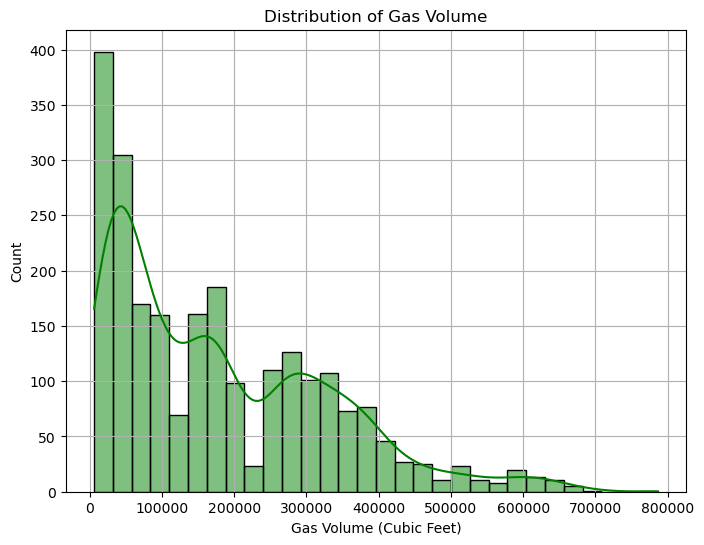

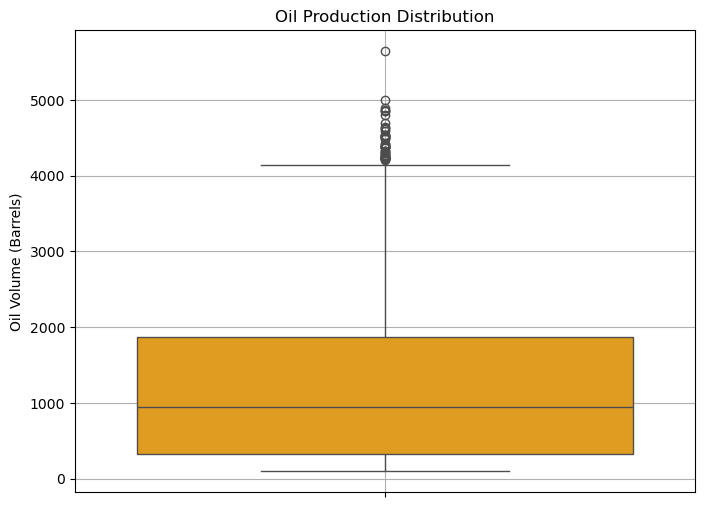

In [5]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Datasets from GitHub Repository
# Replace the URLs with the actual paths to the raw CSV files in your repository
url_petroleum = "https://raw.githubusercontent.com/amolsriv/Oil-and-Gas-Projects/main/petroleum.csv"
url_oil_production = "https://raw.githubusercontent.com/amolsriv/Oil-and-Gas-Projects/main/oil_production.csv"

# Load datasets into DataFrames
petroleum = pd.read_csv(url_petroleum)
oil_production = pd.read_csv(url_oil_production)

# Display First Few Rows of Each Dataset
print("Petroleum Dataset:")
print(petroleum.head())

print("\nOil Production Dataset:")
print(oil_production.head())

# Overview of Each Dataset
print("\nPetroleum Dataset Info:")
petroleum.info()

print("\nOil Production Dataset Info:")
oil_production.info()

# Summary Statistics
print("\nPetroleum Dataset Description:")
print(petroleum.describe())

print("\nOil Production Dataset Description:")
print(oil_production.describe())

# Handle Missing Values
print("\nMissing Values in Petroleum Dataset:")
print(petroleum.isnull().sum())

print("\nMissing Values in Oil Production Dataset:")
print(oil_production.isnull().sum())

# Drop Rows with Missing Values (if applicable)
petroleum = petroleum.dropna()
oil_production = oil_production.dropna()

# Add New Features for Analysis
# Example: Calculate Total Production from oil_production.csv
if 'BORE_OIL_VOL' in oil_production.columns and 'BORE_GAS_VOL' in oil_production.columns:
    oil_production['TOTAL_PRODUCTION'] = oil_production['BORE_OIL_VOL'] + oil_production['BORE_GAS_VOL']

# Convert DATEPRD Column to Datetime
# Correcting the format to match "%Y-%m-%d"
if 'DATEPRD' in petroleum.columns:
    petroleum['DATEPRD'] = pd.to_datetime(petroleum['DATEPRD'], format='%Y-%m-%d')

if 'DATEPRD' in oil_production.columns:
    oil_production['DATEPRD'] = pd.to_datetime(oil_production['DATEPRD'], format='%Y-%m-%d')

# Correlation Analysis: Exclude Non-Numeric Columns
correlation_matrix_petroleum = petroleum.select_dtypes(include=[np.number]).corr()
correlation_matrix_oil_production = oil_production.select_dtypes(include=[np.number]).corr()

# Visualize Correlation Matrices
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_petroleum, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Petroleum Dataset')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_oil_production, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Oil Production Dataset')
plt.show()

# Time Series Visualization
if 'DATEPRD' in oil_production.columns and 'BORE_OIL_VOL' in oil_production.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', data=oil_production, label='Oil Volume')
    plt.title('Oil Production Over Time')
    plt.xlabel('Date')
    plt.ylabel('Oil Volume (Barrels)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Scatter Plots to Analyze Relationships
if 'AVG_DOWNHOLE_PRESSURE' in oil_production.columns and 'BORE_OIL_VOL' in oil_production.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='AVG_DOWNHOLE_PRESSURE', y='BORE_OIL_VOL', data=oil_production)
    plt.title('Downhole Pressure vs Oil Production')
    plt.xlabel('Downhole Pressure (psi)')
    plt.ylabel('Oil Volume (Barrels)')
    plt.grid(True)
    plt.show()

# Distribution Plots
if 'BORE_GAS_VOL' in oil_production.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(oil_production['BORE_GAS_VOL'], bins=30, kde=True, color='green')
    plt.title('Distribution of Gas Volume')
    plt.xlabel('Gas Volume (Cubic Feet)')
    plt.grid(True)
    plt.show()

# Box Plot for Oil Production
if 'BORE_OIL_VOL' in oil_production.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y='BORE_OIL_VOL', data=oil_production, color='orange')
    plt.title('Oil Production Distribution')
    plt.ylabel('Oil Volume (Barrels)')
    plt.grid(True)
    plt.show()